In [144]:
import pandas as pd
import numpy as np
from pprint import pprint
from sys import argv, exit
from datetime import datetime
from IPython.display import display, HTML # For pretty display of DataFrames
import time
import pickle
import matplotlib
import matplotlib.pyplot as plt
from dateutil.relativedelta import relativedelta
import datetime
from collections import defaultdict
%matplotlib inline
matplotlib.style.use('ggplot')
import os
from bs4 import BeautifulSoup
import collections
import re
from nltk.corpus import stopwords
all_stopwords = stopwords.words('english')
from nltk.stem.porter import *

In [145]:
stemmer = PorterStemmer()

## Read forum

In [2]:
df = pd.read_csv('/Users/amitshavit/Desktop/all_forums_repaired_pg.csv')
df.head()

,guid,creation_date,type,source,url,title,text,author,author_age,city_state,lat,lng,phone_number,post_id,timezone_label,timezone_offset
0,4CE5A1AD-6FDC-41E1-B0E2-B58B789D7833,2014-12-17 23:35:00,forum,usasexguide,http://www.USASexGuide.info/forum/showthread.p...,NaN,Felicia Fancy Fantasy ads are here too. http: ...,AlfReady,-1,NaN,\N,NaN,\N,NaN,NaN,\N
1,771557EF-7608-4E13-82BA-19683C1C29E9,2014-12-04 09:36:00,forum,usasexguide,http://www.USASexGuide.info/forum/showthread.p...,NaN,images misc quote_icon.png Originally Posted ...,JaxDog,-1,NaN,\N,NaN,2287717022,NaN,NaN,\N
2,91A10AB8-65EE-41E8-B951-14D01E435DF4,2014-12-05 14:59:00,forum,usasexguide,http://www.USASexGuide.info/forum/showthread.p...,NaN,images misc quote_icon.png Originally Posted ...,JaxDog,-1,NaN,\N,NaN,2285209022,NaN,NaN,\N
3,5B9F1A53-1FD7-4D11-A6A7-9CC6D1B8A26F,2014-12-15 23:40:00,forum,usasexguide,http://www.USASexGuide.info/forum/showthread.p...,NaN,Originally Posted by TallBear [View Original ...,SurfLax,-1,NaN,\N,NaN,\N,NaN,NaN,\N
4,BCF62F70-4825-4289-9346-5A99AD70AF2C,2014-12-11 00:16:00,forum,usasexguide,http://www.USASexGuide.info/forum/showthread.p...,NaN,images misc quote_icon.png Originally Posted ...,Darth Vader1,-1,NaN,\N,NaN,2293109022,NaN,NaN,\N


In [215]:
pattern = re.compile(r'\b(raid|seiz|arrest)(e|ed|s|ing)?\b|busted|\bsting|shut.{1,10}down|leo|uncle|\ble\b|avoid|police|sheriff|beware', re.IGNORECASE)
# pattern = re.compile(r'raid|seize|bust|arrest', re.IGNORECASE)
# pattern = re.compile(r'raid', re.IGNORECASE)

def func(x):
    m = pattern.findall(x)
    
    if m:
        return 1
    else:
        return 0
    
df['containsAlertWords'] = df.text.apply(lambda x:  func(x) )

In [255]:
df['textLength'] = df.text.apply(lambda x: len(x.strip()))

(array([ 2143.,  2129.,  1152.,   530.]),
 array([   0,  500, 1000, 1500, 2000]),
 <a list of 4 Patch objects>)

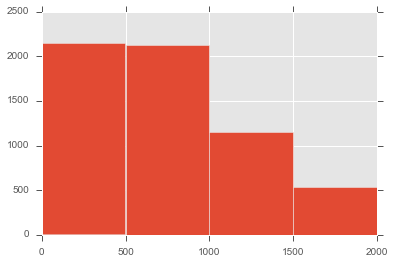

In [256]:
plt.hist(list(df[df['containsAlertWords'] == 1].textLength), bins=[0,500,1000,1500,2000])

In [216]:
len(df[df['containsAlertWords'] == 1])

6750

In [260]:
containsKeyWordsdf = df[(df['containsAlertWords'] == 1) & (df['textLength'] < 2000)]

In [261]:
containsKeyWordsdf.sample(500).to_csv('/Users/amitshavit/Desktop/me.csv', header=False)

In [226]:
count =0
for val in containsKeyWordsdf.text:
    if 'backpage' in val:
        count += 1
        
print count

1412


In [228]:
postsWithBackpage = {}

count = 0
for idx, val in enumerate(df.text):
    if 'backpage' in val:
        count += 1
        
        postsWithBackpage[count] = (idx, val)
        
print count

20436


In [266]:
link = 'http://usasexguide.info/forum/showthread.php?7357-BackPage-Advertiser-Reviews'
import urllib2
response = urllib2.urlopen(link)
html = response.read()

from bs4 import BeautifulSoup
soup = BeautifulSoup(html, 'html.parser')

In [353]:
from bs4 import BeautifulSoup    
import urllib2

In [355]:
def parseCityState(url):
    """Parse the city and state from sexguide info page"""
    
    response = urllib2.urlopen(url)
    html = response.read()

    soup = BeautifulSoup(html, 'html.parser')
    
    printState = False
    printCity = False
    for div in soup.findAll('div', { "class" : "breadcrumb" }):
        for li in div.findAll('li'):

            if printState == True:

                state = li.get_text()

                printCity = True
                printState = False
                continue


            if printCity == True:
                city = li.get_text()
                break

            if 'States' in li.get_text():
                printState = True
    
        break
    
    if city == '':
        city = '-1'
    if state == '':
        state = '-1'
        
    return city, state

In [356]:
new_df = pd.read_csv('/Users/amitshavit/Desktop/le-records-by-keyword.csv')
new_df.shape

(2014, 16)

In [357]:
cityAndStateDataFrame = []
for idx, url in enumerate(new_df.url):
    if 'usasexguide' in url.lower():
        city, state = parseCityState(url)
        cityAndStateDataFrame.append((idx, url, city, state))
        print url, city, state

http://www.USASexGuide.info/forum/showthread.php?9376-BackPage-Advertiser-Reviews&p=2387327&viewfull=1#post2387327 Racine Wisconsin
http://www.USASexGuide.info/forum/showthread.php?7890-BackPage-Advertiser-Reviews&p=2401713&viewfull=1#post2401713 Louisville Kentucky
http://www.USASexGuide.info/forum/showthread.php?3998-General-Reports&p=2414030&viewfull=1#post2414030 Toledo Ohio
http://www.USASexGuide.info/forum/showthread.php?9626-Rants-Raves-and-Opinions-AKA-quot-The-Octagon-quot&p=2388944&viewfull=1#post2388944 Cincinnati Ohio
http://www.USASexGuide.info/forum/showthread.php?7712-BackPage-Advertiser-Reviews&p=2394284&viewfull=1#post2394284 Waukegan/Gurnee Illinois
http://www.USASexGuide.info/forum/showthread.php?4192-Massage-Parlor-Reports&p=2398015&viewfull=1#post2398015 Tucson Arizona
http://www.USASexGuide.info/forum/showthread.php?6889-BackPage-Advertiser-Reviews&p=2396577&viewfull=1#post2396577 Tucson Arizona
http://www.USASexGuide.info/forum/showthread.php?9626-Rants-Raves-and

KeyboardInterrupt: 

In [361]:
cityAndStateDataFrame[1]

(1,
 'http://www.USASexGuide.info/forum/showthread.php?7890-BackPage-Advertiser-Reviews&p=2401713&viewfull=1#post2401713',
 u'Louisville',
 u'Kentucky')

In [362]:
new_df_with_city_and_state = new_df
new_df_with_city_and_state['city'] = '0'
new_df_with_city_and_state['state'] = '0'

In [376]:
for key in cityAndStateDataFrame:
    (rowNumber, url, city, state) = key[0], key[1], key[2], key[3]

    new_df_with_city_and_state.iloc[rowNumber]['city'] = city
    new_df_with_city_and_state.iloc[rowNumber]['state'] = state

/usr/local/lib/python2.7/site-packages/IPython/kernel/__main__.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
/usr/local/lib/python2.7/site-packages/IPython/kernel/__main__.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy


In [378]:
with open('/Users/amitshavit/Desktop/cityAndState.csv', 'w') as otp:
    
    otp.write('rowNumber,city,state,url\n')
    
    for key in cityAndStateDataFrame:
        (rowNumber, url, city, state) = key[0], key[1], key[2], key[3]
        line = '%d,%s,%s,%s\n' % (rowNumber, city, state, url)
        otp.write(line)

In [380]:
new_df['city'] = '0'
new_df['state'] = '0'

In [382]:
for key in cityAndStateDataFrame:
    (rowNumber, url, city, state) = key[0], key[1], key[2], key[3]
    
    new_df.iloc[rowNumber]['city'] = city
    new_df.iloc[rowNumber]['state'] = state

/usr/local/lib/python2.7/site-packages/IPython/kernel/__main__.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
/usr/local/lib/python2.7/site-packages/IPython/kernel/__main__.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy


In [383]:
new_df.head()

,guid,creation_date,type,source,url,title,text,author,author_age,city_state,lat,lng,phone_number,post_id,timezone_label,timezone_offset,city,state
0,7C8ECFE2-FB22-4881-A6E3-D67F9C8B8E7F,2015-03-04 12:11:00,forum,usasexguide,http://www.USASexGuide.info/forum/showthread.p...,NaN,Originally Posted by DieselMike [View Origina...,Trifix1,-1,NaN,\N,NaN,\N,NaN,NaN,\N,0,0
1,E28544D6-4BD7-4FA3-A8D6-D3BE75A6AB3A,2015-03-16 19:19:00,forum,usasexguide,http://www.USASexGuide.info/forum/showthread.p...,NaN,Originally Posted by Urbanwonder42 [View Orig...,Rlthree,-1,NaN,\N,NaN,\N,NaN,NaN,\N,0,0
2,D90A3A64-2AA1-4EF7-9696-F469B7A828B3,2015-03-26 22:06:00,forum,usasexguide,http://www.USASexGuide.info/forum/showthread.p...,NaN,"Here's what's going on in CBus, Ohio. My PM m...",MrChill,-1,NaN,\N,NaN,\N,NaN,NaN,\N,0,0
3,A7E6A11A-CE95-4516-A1AD-747D016C6ED1,2015-03-05 17:18:00,forum,usasexguide,http://www.USASexGuide.info/forum/showthread.p...,NaN,Originally Posted by Lugnutz [View Original P...,VelvetRayne,-1,NaN,\N,NaN,\N,NaN,NaN,\N,0,0
4,0207E025-5B51-4886-95E7-78B11D3E15AC,2015-03-10 10:56:00,forum,usasexguide,http://www.USASexGuide.info/forum/showthread.p...,NaN,I have seen her post in the past but it has be...,Bythelake,-1,NaN,\N,NaN,\N,NaN,NaN,\N,0,0


In [334]:
print new_df[new_df.city != 0].shape

(0, 18)


In [ ]:
# Random
    
for idx, link in enumerate(df.url):

#     link =  'http://usasexguide.info/forum/showthread.php?7357-BackPage-Advertiser-Reviews'
    response = urllib2.urlopen(link)
    html = response.read()

    soup = BeautifulSoup(html, 'html.parser')
    
    printState = False
    printCity = False
    for div in soup.findAll('div', { "class" : "breadcrumb" }):
        for li in div.findAll('li'):

            if printState == True:

                print li.get_text()

                printCity = True
                printState = False
                continue


            if printCity == True:
                print li.get_text()
                break

            if 'States' in li.get_text():
                printState = True

## Grab city from backpage link

In [239]:
df['cityAssociatedWithPost'] = 0

In [236]:
citiesInPostsWithBackpageLink = []

for item in postsWithBackpage:
    text = postsWithBackpage[item][1]
    idx = postsWithBackpage[item][0]
    
    for word in text.strip().split():
        if 'backpage' in word:
            city = word.split('.')[0]
            citiesInPostsWithBackpageLink.append(city)

In [127]:
# df[df['containsAlertWords'] == 1].text

In [37]:
from collections import Counter

words = Counter()

for text in df.text.values:
    for word in text.strip().lower().split():
        if word not in all_stopwords:
            words[word] += 1

/usr/local/lib/python2.7/site-packages/IPython/kernel/__main__.py:7: UnicodeWarning: Unicode equal comparison failed to convert both arguments to Unicode - interpreting them as being unequal


In [43]:
words.most_common(400)

[('\\n', 398203),
 ('http:', 176754),
 ('forum', 161243),
 ('posted', 156642),
 ('-1', 145271),
 ('originally', 101386),
 ('original', 94242),
 ('post]', 93169),
 ('[view', 93167),
 ('usasexguide', 88880),
 ('like', 68924),
 ('one', 65065),
 ('would', 63659),
 ('post', 62057),
 ('get', 58009),
 ('good', 50638),
 ('report', 50086),
 ('time', 49983),
 ('see', 48047),
 ('know', 46090),
 ('images', 42253),
 ("don't", 42187),
 ("i'm", 41420),
 ('got', 40460),
 ('femaleescorts', 40199),
 ('back', 37723),
 ('theeroticreview', 35895),
 ('girl', 33527),
 ('anyone', 32536),
 ("she's", 29120),
 ('go', 28958),
 ('nice', 28673),
 ('think', 28218),
 ('really', 28151),
 ('quote', 28147),
 ('said', 27982),
 ('seen', 26985),
 ('misc', 26950),
 ('quote_icon.png', 26936),
 ('little', 26831),
 ('never', 26324),
 ('her.', 26280),
 ('great', 26130),
 ('saw', 25457),
 ('going', 24920),
 ('want', 24623),
 ("i've", 24533),
 ('could', 24174),
 ("it's", 23726),
 ('even', 23140),
 ('girls', 22299),
 ('new', 21953

## For each author look at their contribution

In [53]:
all_authors = Counter()

for author in df.author.values:
    current_author = author.lower().replace(' ', '_')
    all_authors[current_author] += 1

In [55]:
all_authors.pop('view_profile')
all_authors.most_common(20)

[('yssup_rider', 962),
 ('inicky46', 496),
 ('iiffofrdb', 488),
 ('jd_barleycorn', 482),
 ('nitetimer', 445),
 ('gagambler', 362),
 ('wtf', 361),
 ('cuteoldguy', 360),
 ('i_b_hankering', 357),
 ('skarphedin', 326),
 ('gimmethat', 308),
 ('lexuslover', 292),
 ('whirlaway', 289),
 ('jaxtantricman', 289),
 ('mrfisher', 287),
 ("i'va_biggen", 283),
 ('hollywoodguy', 270),
 ('dallasrain', 266),
 ('bertlong', 265),
 ('bamatide', 264)]

In [93]:
post_count_by_author = []
for key in all_authors:
    post_count_by_author.append(all_authors[key])

post_count_by_author = list(reversed(np.sort(post_count_by_author)))
post_count_by_author[:10]

[962, 496, 488, 482, 445, 362, 361, 360, 357, 326]

In [98]:
ninety_percent = 0.9*(sum(post_count_by_author))
mysum = 0.0
for idx, val in enumerate(post_count_by_author):
    mysum += val
    if mysum > ninety_percent:
        print idx
        break

6968


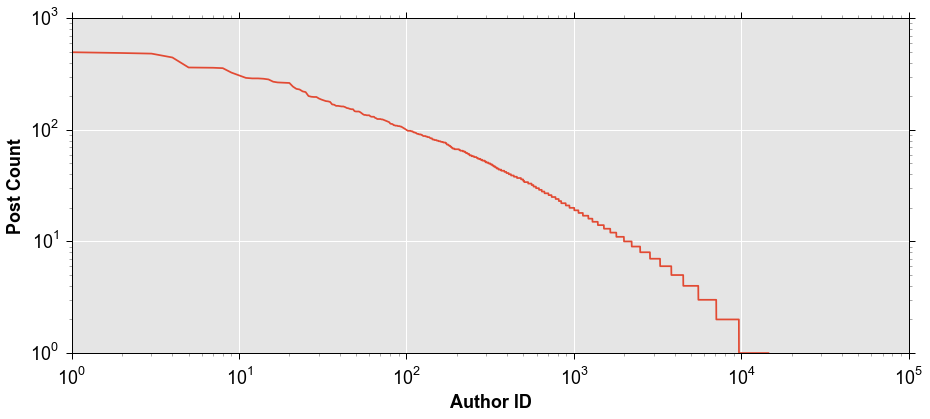

In [115]:
fig = plt.figure(num=None, figsize=(15, 6), dpi=80, facecolor='w', edgecolor='k')
graph = fig.add_subplot(111)

graph.loglog(post_count_by_author)

graph.set_xlabel('Author ID',fontweight='bold',fontsize='18')
graph.set_ylabel('Post Count',fontweight='bold',fontsize='18')

graph.xaxis.label.set_color('black')
graph.yaxis.label.set_color('black')
graph.tick_params(axis='x',colors='black')
graph.tick_params(axis='y',colors='black')

for ax in [graph]:
    # tick label font size
    ax.tick_params(axis='x',colors='black')
    ax.tick_params(axis='y',colors='black')

    for tick in ax.xaxis.get_major_ticks():
        tick.label.set_fontsize(18)

    for tick in ax.yaxis.get_major_ticks():
        tick.label.set_fontsize(18)
    
    # add black border
    plt.setp(ax.spines.values(), color='black')

plt.show()

## Simple Naive Bayes

In [133]:
X = pd.read_csv('/Users/amitshavit/Desktop/labeled.csv')
X.head()

,Unnamed: 0,guid,creation_date,type,source,url,title,text,author,author_age,city_state,lat,lng,phone_number,post_id,timezone_label,timezone_offset,label
0,0,4CE5A1AD-6FDC-41E1-B0E2-B58B789D7833,2014-12-17 23:35:00,forum,usasexguide,http://www.USASexGuide.info/forum/showthread.p...,NaN,Felicia Fancy Fantasy ads are here too. http: ...,AlfReady,-1,NaN,\N,NaN,\N,NaN,NaN,\N,0
1,1,771557EF-7608-4E13-82BA-19683C1C29E9,2014-12-04 09:36:00,forum,usasexguide,http://www.USASexGuide.info/forum/showthread.p...,NaN,images misc quote_icon.png Originally Posted ...,JaxDog,-1,NaN,\N,NaN,2287717022,NaN,NaN,\N,0
2,2,91A10AB8-65EE-41E8-B951-14D01E435DF4,2014-12-05 14:59:00,forum,usasexguide,http://www.USASexGuide.info/forum/showthread.p...,NaN,images misc quote_icon.png Originally Posted ...,JaxDog,-1,NaN,\N,NaN,2285209022,NaN,NaN,\N,0
3,3,5B9F1A53-1FD7-4D11-A6A7-9CC6D1B8A26F,2014-12-15 23:40:00,forum,usasexguide,http://www.USASexGuide.info/forum/showthread.p...,NaN,Originally Posted by TallBear [View Original ...,SurfLax,-1,NaN,\N,NaN,\N,NaN,NaN,\N,0
4,4,BCF62F70-4825-4289-9346-5A99AD70AF2C,2014-12-11 00:16:00,forum,usasexguide,http://www.USASexGuide.info/forum/showthread.p...,NaN,images misc quote_icon.png Originally Posted ...,Darth Vader1,-1,NaN,\N,NaN,2293109022,NaN,NaN,\N,1


In [141]:
print (X.label == 0).sum()
print (X.label == 1).sum()
print (X.label == 2).sum()

966
37
4


In [173]:
all_keywords_pos_instances = []
all_keywords_neg_instances = []

for idx, row in enumerate(X.text):
    textfield = row.strip().lower()
    textfield = textfield.decode('utf8')
    
    for word in textfield.split():
        
        #stemmed_word = stemmer.stem(word)
        stemmed_word = word
        
        if stemmed_word not in all_stopwords:
            
            if X.iloc[idx].label == 0:
                all_keywords_neg_instances.append(stemmed_word)
            else:
                all_keywords_pos_instances.append(stemmed_word)

## Find all keywords in pos instances that happen more than once

In [212]:
counter_pos_keywords = Counter(all_keywords_pos_instances)

print counter_pos_keywords.most_common(100)

repeat_pos_keywords = []
for word in counter_pos_keywords:
    if counter_pos_keywords[word] > 1:
        repeat_pos_keywords.append(word)

[(u'posted', 26), (u'originally', 25), (u'http:', 25), (u'one', 25), (u'[view', 24), (u'post]', 24), (u'original', 24), (u'know', 22), (u'like', 22), (u'got', 21), (u'see', 19), (u'good', 18), (u"don't", 17), (u'would', 15), (u'news', 14), (u'girl', 14), (u'get', 14), (u"i'm", 13), (u'never', 12), (u'sure', 12), (u'girls', 11), (u'make', 11), (u'going', 11), (u'pretty', 11), (u'leo', 11), (u'could', 11), (u'time', 10), (u'always', 10), (u"didn't", 9), (u'saw', 9), (u"she's", 9), (u'anything', 9), (u'let', 9), (u'providers', 9), (u"i've", 9), (u'may', 8), (u'still', 8), (u'think', 8), (u'really', 8), (u'find', 8), (u'want', 7), (u'went', 7), (u"you're", 7), (u'another', 7), (u'said', 7), (u'uncle', 7), (u'place', 7), (u'little', 7), (u'since', 7), (u'looks', 7), (u'times', 7), (u'well', 7), (u'her.', 6), (u'femaleescorts', 6), (u'best', 6), (u'ago.', 6), (u'12', 6), (u'around', 6), (u'images', 6), (u"that's", 6), (u'misc', 6), (u'also', 6), (u'play', 6), (u'detroit.backpage.com', 6), (u

In [174]:
unique_pos_keywords = []
for word in all_keywords_pos_instances:
    if word in all_keywords_neg_instances:
        unique_pos_keywords.append(word)

In [176]:
print Counter(all_keywords_neg_instances).most_common(20)
print Counter(all_keywords_pos_instances).most_common(20)

[(u'http:', 899), (u'posted', 596), (u'original', 551), (u'originally', 546), (u'[view', 543), (u'post]', 543), (u'one', 345), (u'like', 325), (u'femaleescorts', 304), (u'would', 288), (u'time', 265), (u'see', 265), (u'get', 247), (u'good', 246), (u'know', 235), (u'images', 199), (u'anyone', 195), (u'misc', 193), (u'quote_icon.png', 193), (u"i'm", 184)]
[(u'posted', 26), (u'originally', 25), (u'http:', 25), (u'one', 25), (u'[view', 24), (u'post]', 24), (u'original', 24), (u'know', 22), (u'like', 22), (u'got', 21), (u'see', 19), (u'good', 18), (u"don't", 17), (u'would', 15), (u'news', 14), (u'girl', 14), (u'get', 14), (u"i'm", 13), (u'never', 12), (u'sure', 12)]


In [190]:
pos_authors = []
for idx, row in X.iterrows():
    if row.label == 1 or row.label == 2:
        pos_authors.append(row.author.lower())

In [195]:
repeat_pos_authors = []
counter_pos_authors = Counter(pos_authors)
for author in counter_pos_authors:
    if counter_pos_authors[author] > 1:
        repeat_pos_authors.append(author)

In [200]:
repeat_pos_authors = [i for i in repeat_pos_authors if i != 'view profile']
repeat_pos_authors

['marlowe', 'hammer67', 'elmsly', 'pman1971']

In [ ]:
# Test whether these authors appear in negative occurences

In [168]:
print len(unique_pos_keywords), len(all_keywords_neg_instances), len(all_keywords_pos_instances)

2993 57093 3404


In [201]:
# unique_pos_keywords

In [128]:
from sklearn.cross_validation import train_test_split
from sklearn.naive_bayes import GaussianNB

# Get the X and y data


# Initialize the classifier
clf = GaussianNB()

# Get train test?
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)
clf.fit(X_train, y_train)

# Predict
y_pred = clf.predict(X_test)

## New stuff